In [1]:
%matplotlib inline

import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import calendar
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

C:\Users\EEIE\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# OLS Minimos Cuadrados Orinarios

http://blog.findemor.es/2018/01/modelos-predictivos-en-python/ 

In [2]:
#Se cargan los archivos 

total=pd.read_excel("GLM.xlsx",index_col=0) 
total

,APRENDIZ,PROD_NAL,OBRERO,TOTPERSONAL,COSTOS_PT_ELAB_TERCEROS,OUTSOURCING_ADM,MUESTRASGRATIS_PROD,PUBLICIDAD_PROD,GASTOSCARTERA,GASTOSMAQ_USOPROPIO,SEGUROS,TOTALINV_EINFORMATICA,TOTALINVER,INV_PT,MPCOMPRADA,VENTAS,Ln,log
1,5.370346,2.000000,10.0,13.0,1.789890e+05,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,43511.436095,27708.860206,493915.398347,8.695000e+04,2602400.0,3460300.0,15.06,6.54
2,5.370346,12.562613,3.0,9.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,4535.000000,27708.860206,53869.000000,1.245539e+06,102941.0,296411.0,12.60,5.47
3,5.370346,1.000000,30.0,36.0,2.726740e+05,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,993.000000,27708.860206,3200.000000,7.972300e+04,867491.0,1597520.0,14.28,6.20
4,5.370346,2.000000,3.0,5.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,43511.436095,27708.860206,493915.398347,7.102000e+04,26720.0,231480.0,12.35,5.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,3.000000,12.562613,27.0,46.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,10847.000000,11182.000000,11182.000000,1.435000e+04,618268.0,1100444.0,13.91,6.04
10293,2.000000,12.562613,29.0,46.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,4900.000000,27708.860206,493915.398347,5.510530e+05,2164604.0,3300208.0,15.01,6.52
10294,12.000000,9.000000,260.0,303.0,6.470340e+05,165701.494784,15326.602761,22549.880305,2.444700e+04,246692.380952,34127.000000,21831.000000,503083.000000,9.949920e+05,6940062.0,15443532.0,16.55,7.19
10295,2.000000,12.562613,11.0,21.0,1.158180e+06,165701.494784,15326.602761,22549.880305,8.969314e+06,246692.380952,3149.000000,27708.860206,493915.398347,1.245539e+06,421689.0,1180126.0,13.98,6.07


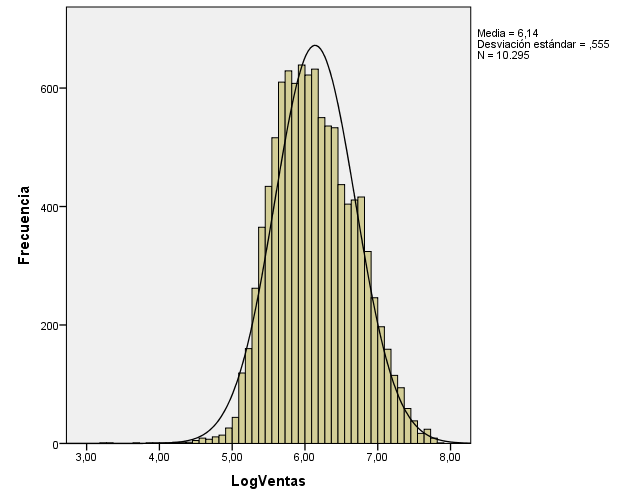

### Análisis de clúster

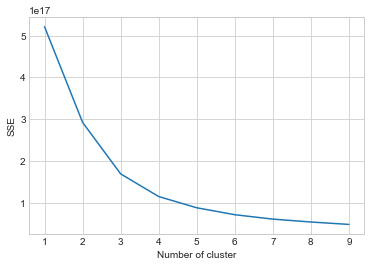

In [3]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(total)
    total["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [4]:
kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(total)

In [5]:
centros = kmeans_2.cluster_centers_[kmeans_2.labels_]
distancia = np.sqrt(np.sum((total-centros)**2, axis=1))
data_clean = np.argwhere(distancia < np.mean(distancia) + 3*np.std(distancia)).flatten()
total_2 = total.iloc[data_clean]
total_2.to_csv("Limpios.csv", decimal=",")

In [6]:
X = total_2.drop(["log",'clusters'],axis=1).as_matrix()
variables = total_2.drop("log",axis=1).columns
y = total["log"]
scale = StandardScaler()

In [7]:
formula = "log ~ APRENDIZ + PROD_NAL + OBRERO + TOTPERSONAL + COSTOS_PT_ELAB_TERCEROS + OUTSOURCING_ADM + MUESTRASGRATIS_PROD + PUBLICIDAD_PROD + GASTOSCARTERA + GASTOSMAQ_USOPROPIO + SEGUROS + TOTALINV_EINFORMATICA + TOTALINVER + INV_PT + MPCOMPRADA"

In [8]:
est = ols(formula, total_2).fit()
 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    log   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1102.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:58:55   Log-Likelihood:                -3205.0
No. Observations:               10151   AIC:                             6442.
Df Residuals:                   10135   BIC:                             6558.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.9171      0.616     11.234      0.000       5.710       8.124
APRENDIZ                   -0.0404      0.002    -23.748      0.000      -0.044      -0.037
PROD_NAL                   -0.0052      0.001     -9.132      0.000      -0.006      -0.004
OBRERO                     -0.0022      0.000    -12.036      0.000      -0.003      -0.002
TOTPERSONAL                 0.0057      0.000     35.524      0.000       0.005       0.006
COSTOS_PT_ELAB_TERCEROS   6.03e-09    4.8e-09      1.257      0.209   -3.37e-09    1.54e-08
OUTSOURCING_ADM          -1.17e-07   7.22e-08     -1.622      0.105   -2.58e-07    2.44e-08
MUESTRASGRATIS_PROD      9.178e-07   1.34e-06      0.686      0.493   -1.71e-06    3.54e-06
PUBLICIDAD_PROD          2.258e-06   4.59e-07      4.924      0.000    1.36e-06    3.16e-06
GASTOSCARTERA           -1.402e-08    9.8e-10    -14.302      0.000   -1.59e-08   -1.21e-08
GASTOSMAQ_USOPROPIO     -2.737e-06   2.49e-06     -1.097      0.273   -7.63e-06    2.15e-06
SEGUROS                 -1.435e-06   1.51e-07     -9.523      0.000   -1.73e-06   -1.14e-06
TOTALINV_EINFORMATICA   -3.213e-06   2.92e-07    -10.987      0.000   -3.79e-06   -2.64e-06
TOTALINVER              -7.409e-08   1.27e-08     -5.811      0.000   -9.91e-08   -4.91e-08
INV_PT                  -4.333e-08   5.39e-09     -8.045      0.000   -5.39e-08   -3.28e-08
MPCOMPRADA               1.185e-07   2.36e-09     50.275      0.000    1.14e-07    1.23e-07
==============================================================================
Omnibus:                     1319.092   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3872.754
Skew:                          -0.694   Prob(JB):                         0.00
Kurtosis:                       5.688   Cond. No.                     1.52e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Normalidad Residuos

In [9]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(est.resid)
lzip(name, test)

[('Jarque-Bera', 3872.7543610968837),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -0.6944742961270204),
 ('Kurtosis', 5.688339895908145)]

JB> Chi^2 two-tail prob entonces los residuos no son normales

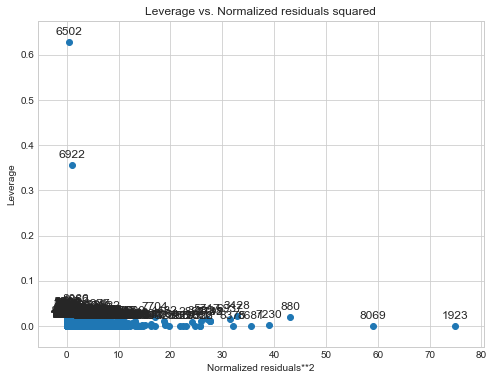

In [10]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(est, ax = ax)

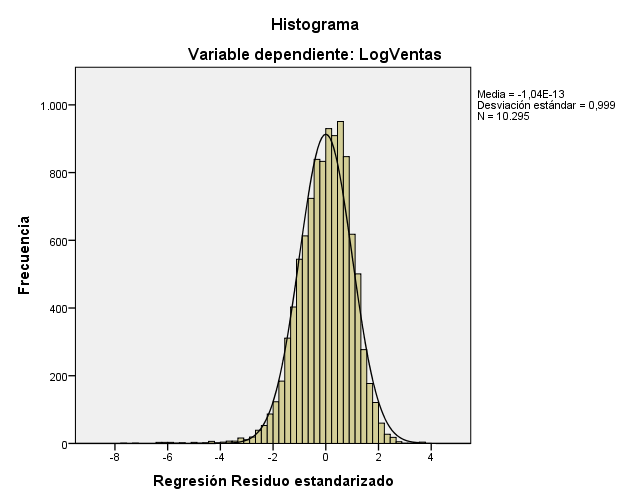

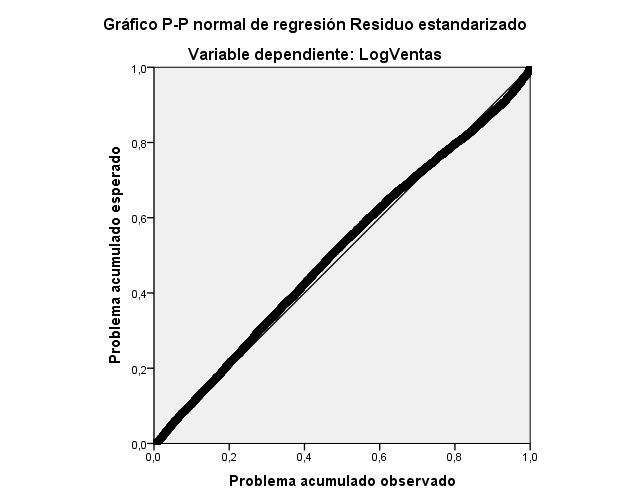

# Heterocedasticidad

Breush-Pagan test:

In [12]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(est.resid, est.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 977.14095493364221),
 ('p-value', 1.0671766769814971e-198),
 ('f-value', 71.967703955355717),
 ('f p-value', 2.8699499608721719e-209)]

La prueba Breush-Pagan crea una estadística que está distribuida en chi-cuadrado y para sus datos esa estadística = 7.18. El valor de p es el resultado de la prueba de ji cuadrado y (normalmente) la hipótesis nula se rechaza para el valor de p <0,05.

En este caso p<0,05 se rechaza la hipotesis nula de homocedasticidad